In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [2]:
mate_pi = pd.read_csv("Mate_PI_2020_2024.csv", index_col=0, dtype={"Condicion":"category", "Tipo_Cursada":"category"})

# Análisis exploratorio de los datos

**Breve descripción del dataset**

Cada registro es único, corresponde a los resultados de cada alumno, identificados por el índice de fila.

- **1P1F**: nota del Primer Parcial, Primera Fecha.
- **1P2F**: nota del Primer Parcial, Segunda Fecha.
- **2P1F**: nota del Segundo Parcial, Primera Fecha.
- **2P2F**: nota del Segundo Parcial, Segunda Fecha.

Los datos de cada columna son numéricos, la celda está vacía si el alumno no se presentó a rendir. La nota mínima para aprobar cada parcial es 4, la materia se promociona con un promedio mayor o igual a 6. 

- **F1**: nota del Flotante de Primer Parcial. Esta fecha permite recuperar el Primer Parcial si ya se logró aprobar el Segundo en las instancias anteriores.
- **F2**: nota del Flotante de Segundo Parcial. Esta fecha permite recuperar el Segundo Parcial si ya se logró aprobar el Primero en las instancias anteriores.
- **Condicion**: columna categórica, indica la condición final del alumno luego de los parciales. *Libre*: no se presentó a ningún parcial. *Abandonó*: rindió algún parcial pero no agotó las instancias posibles. *Desaprobado*: no logró aprobar Primer Parcial y Segundo Parcial luego de agotar las instancias posibles, o sí lo hizo pero no logró alcanzar el promedio de Promoción. *Promocionado*: aprobó ambos parciales con un promedio mayor o igual a 6.
- **Final**: nota final de los alumnos promocionados, la celda está vacía en los otros casos.
- **Año**: año de la cursada.
- **Tipo_Cursada**: columna categórica, indica el período en el que se realizó la cursada. *Verano*: cursada intensiva de Enero-Febrero. *1er Semestre*: cursada regular de Marzo-Junio. *Anticipada*: cursada regular de Agosto-Noviembre.
- **Virtual**: indica si la cursada fue dictada en modalidad virtual o no.
- **Oral**: en las cursadas virtuales, además de aprobar los parciales, se requería aprobar un examen oral. Esta columna indica la nota obtenida, la celda está vacía si el alumno no se presentó.
- **Grupo**: indica nombre de la comisión de la que se extrajeron los datos.

In [3]:
mate_pi.head()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
0,NaN,NaN,NaN,NaN,NaN,NaN,Desaprobado,NaN,2020,Verano,No,NaN,NaN
1,NaN,7.0,8.2,NaN,NaN,NaN,Promocionado,8.0,2020,Verano,No,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Desaprobado,NaN,2020,Verano,No,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Desaprobado,NaN,2020,Verano,No,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Libre,NaN,2020,Verano,No,NaN,NaN


In [4]:
mate_pi.dtypes

1P1F             float64
1P2F             float64
2P1F             float64
2P2F             float64
F1               float64
F2               float64
Condicion       category
Final            float64
Año                int64
Tipo_Cursada    category
Virtual           object
Oral              object
Grupo             object
dtype: object

In [5]:
mate_pi["Condicion"].info()

<class 'pandas.core.series.Series'>
Index: 1144 entries, 0 to 1143
Series name: Condicion
Non-Null Count  Dtype   
--------------  -----   
1144 non-null   category
dtypes: category(1)
memory usage: 10.3 KB


In [6]:
mate_pi["Condicion"] = mate_pi["Condicion"].cat.set_categories(
                            ["Libre", "Abandonó", "Desaprobado", "Promocionado"],
                            ordered = True)

In [7]:
mate_pi["Tipo_Cursada"] = mate_pi["Tipo_Cursada"].cat.set_categories(
                            ["Verano", "1er Semestre", "Anticipada"],
                            ordered = True)

<Axes: xlabel='Condicion'>

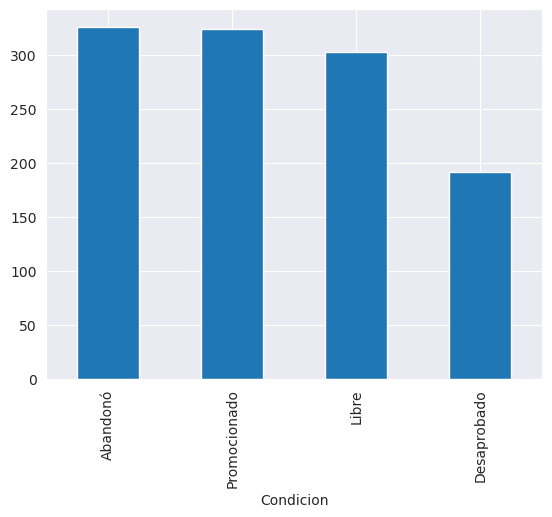

In [8]:
mate_pi["Condicion"].value_counts().plot.bar()

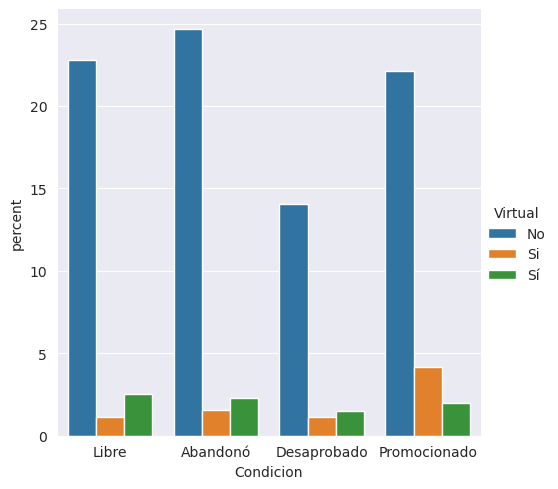

In [9]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", stat="percent", hue="Virtual")

In [10]:
mate_pi["Virtual"].unique()

array(['No', 'Si', 'Sí'], dtype=object)

In [11]:
mate_pi["Virtual"] = mate_pi["Virtual"].str.replace("i", "í")

In [12]:
mate_pi["Virtual"].unique()

array(['No', 'Sí'], dtype=object)

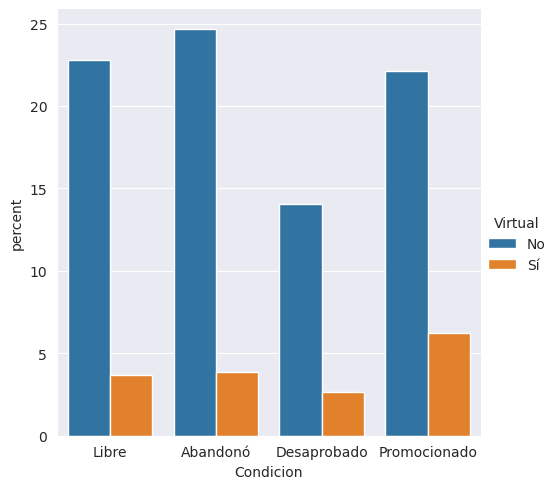

In [13]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", stat="percent", hue="Virtual")

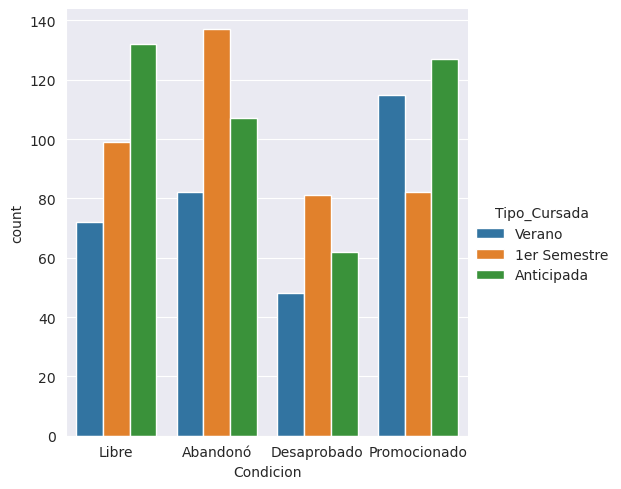

In [14]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", hue="Tipo_Cursada")

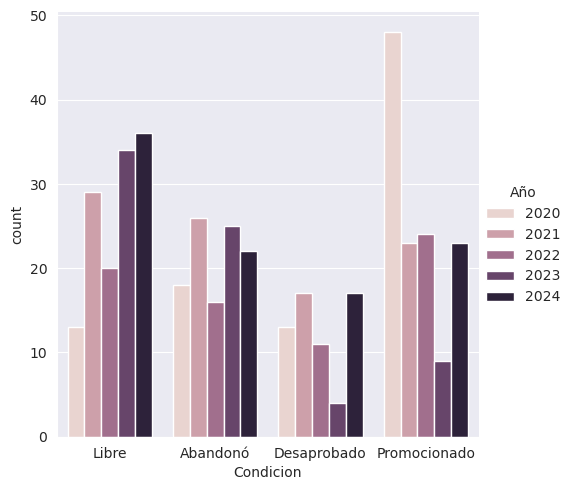

In [15]:
sns.catplot(data=mate_pi[mate_pi["Tipo_Cursada"] == "Anticipada"], x="Condicion", kind="count", hue="Año")

In [16]:
mate_pi.groupby("Virtual")["Condicion"].value_counts(normalize=True)

Virtual  Condicion   
No       Abandonó        0.294671
         Libre           0.272727
         Promocionado    0.264368
         Desaprobado     0.168234
Sí       Promocionado    0.379679
         Abandonó        0.235294
         Libre           0.224599
         Desaprobado     0.160428
Name: proportion, dtype: float64

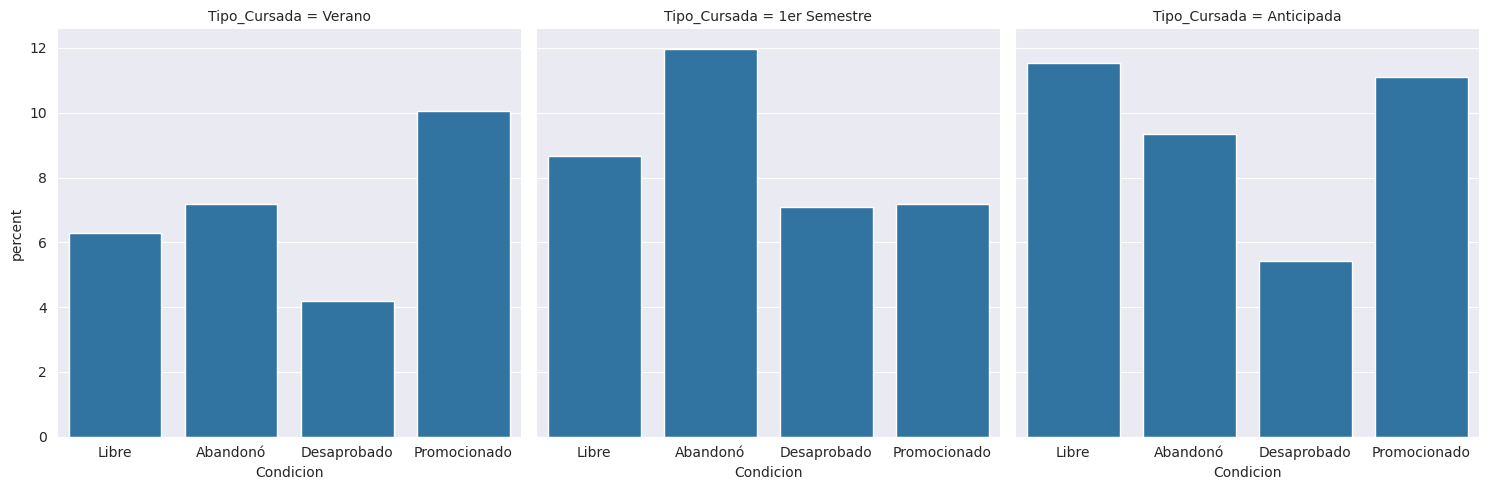

In [17]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", col="Tipo_Cursada", stat="percent")

/tmp/ipykernel_10375/2239611782.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=mate_pi, x="Condicion", kind="count", col="Año", row="Tipo_Cursada", palette=["brown", "yellow", "red", "green"], label="Resumen")


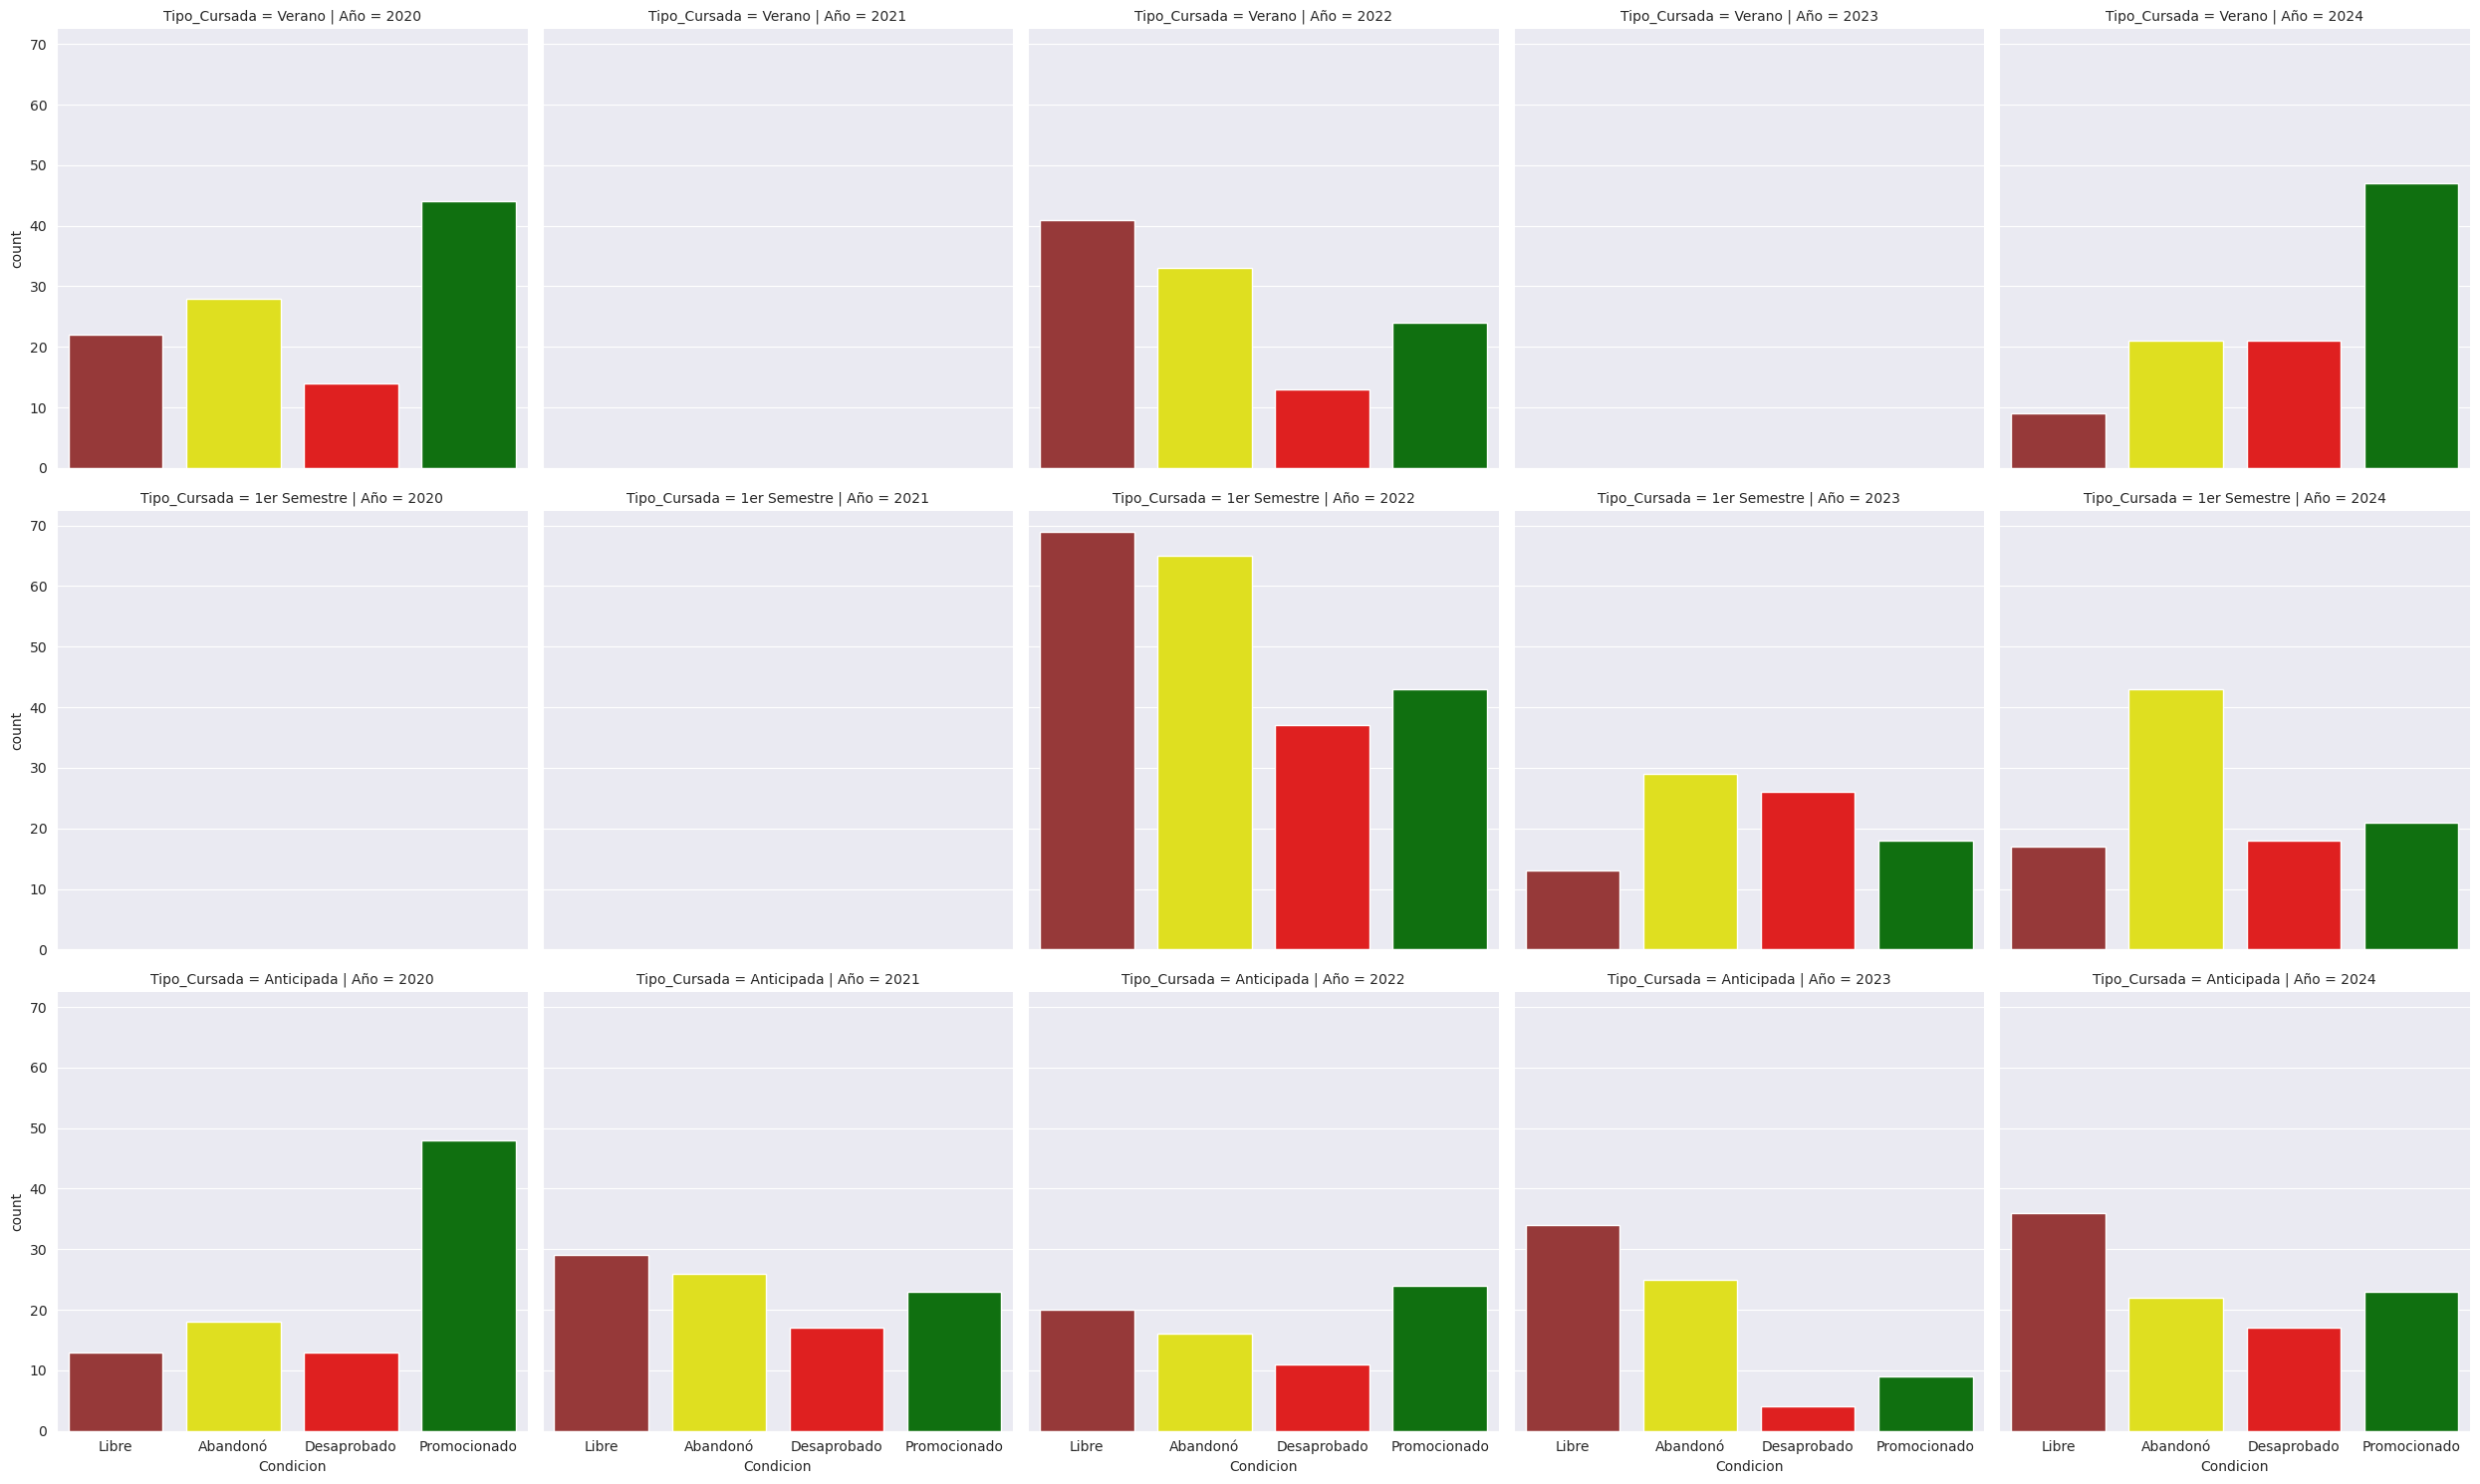

In [18]:
sns.catplot(data=mate_pi, x="Condicion", kind="count", col="Año", row="Tipo_Cursada", palette=["brown", "yellow", "red", "green"], label="Resumen")

In [19]:
Verano_2020=mate_pi[ (mate_pi["Año"] == 2020) & (mate_pi["Tipo_Cursada"] == "Verano")]

/tmp/ipykernel_10375/2858966777.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Verano_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )


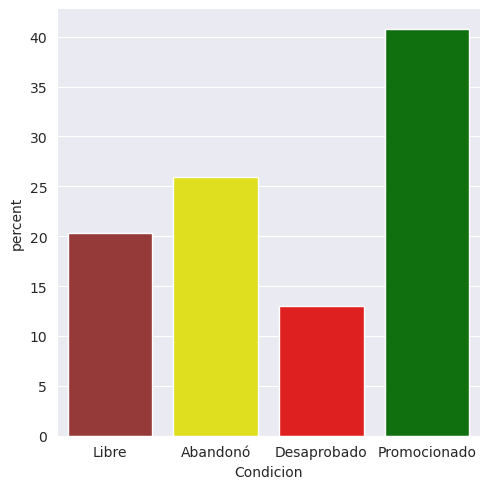

In [20]:
sns.catplot(data=Verano_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )

In [21]:
Anticipada_2024=mate_pi[ (mate_pi["Año"] == 2024) & (mate_pi["Tipo_Cursada"] == "Anticipada")]

In [22]:
Anticipada_2024

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
1046,4.4,8.0,6.0,NaN,NaN,NaN,Promocionado,7.0,2024,Anticipada,No,NaN,NaN
1047,0.0,0.4,0.0,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN
1048,4.5,6.1,5.9,NaN,NaN,NaN,Promocionado,6.0,2024,Anticipada,No,NaN,NaN
1049,NaN,8.2,9.5,NaN,NaN,NaN,Promocionado,9.0,2024,Anticipada,No,NaN,NaN
1050,9.5,NaN,NaN,6.3,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,NaN,0.9,0.4,0.9,NaN,NaN,Desaprobado,NaN,2024,Anticipada,No,NaN,NaN
1140,NaN,NaN,NaN,NaN,NaN,NaN,Libre,NaN,2024,Anticipada,No,NaN,NaN
1141,7.0,NaN,8.5,NaN,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
1142,0.2,NaN,NaN,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN


/tmp/ipykernel_10375/2415387664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )


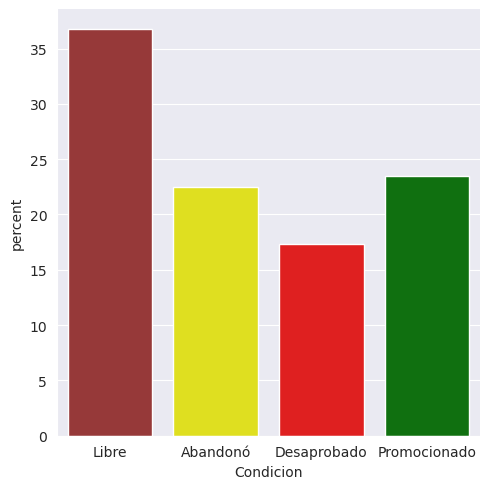

In [23]:
sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )

In [24]:
Anticipada_2020=mate_pi[ (mate_pi["Año"] == 2020) & (mate_pi["Tipo_Cursada"] == "Anticipada")]

/tmp/ipykernel_10375/1523712708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Anticipada_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )
/tmp/ipykernel_10375/1523712708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )


[]

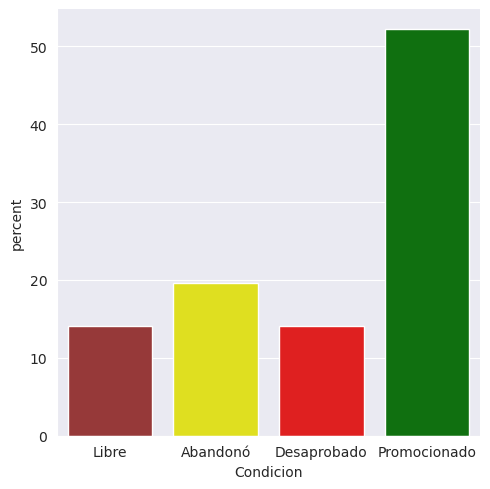

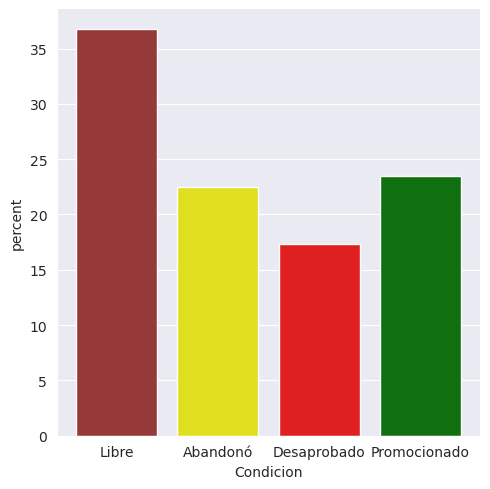

In [25]:
sns.catplot(data=Anticipada_2020, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )
sns.catplot(data=Anticipada_2024, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"] )
plt.plot()

In [26]:
# A function to filter data: Año, Tipo_Cursada
def filtered_data(data, año, tipo_cursada):
    """

    Parameters
    ----------
    data : pandas DataFrame
    año : integer
        Year to filter, from 2020 to 2024
    tipo_cursada : string
        Options: Verano, Intensiva, 1er Semestre
    Returns
    -------
    pandas DataFrame

    """
    return data[ (data["Año"] == año) & (data["Tipo_Cursada"] == tipo_cursada)]

/tmp/ipykernel_10375/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )
/tmp/ipykernel_10375/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )
/tmp/ipykernel_10375/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )
/tmp/ipykernel_10375/2769064095.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "

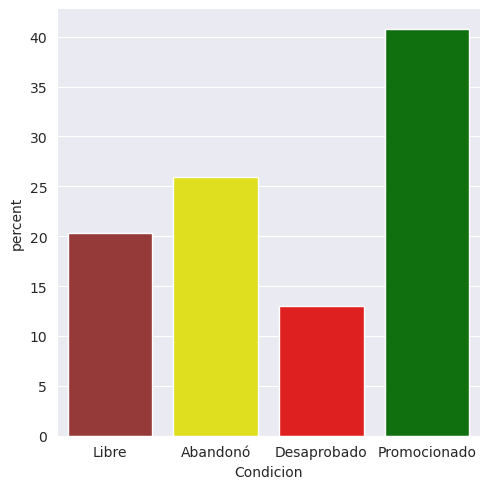

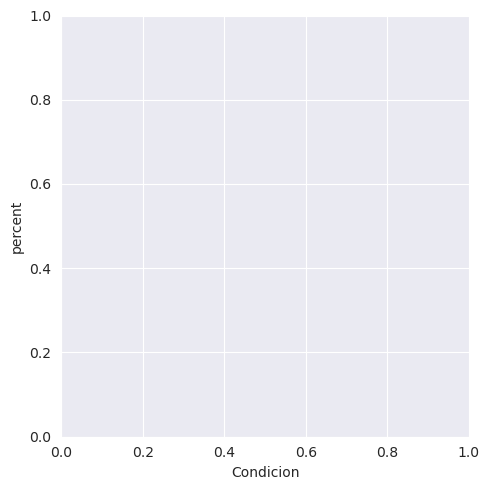

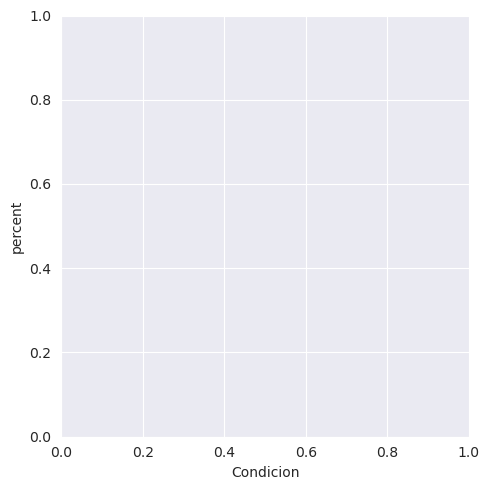

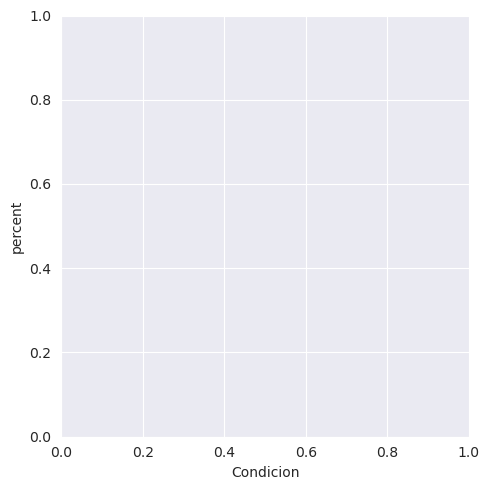

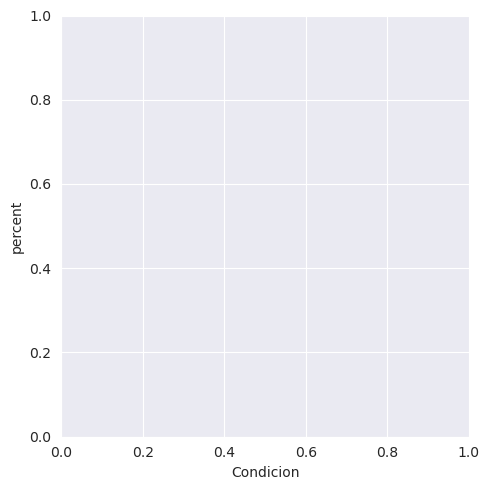

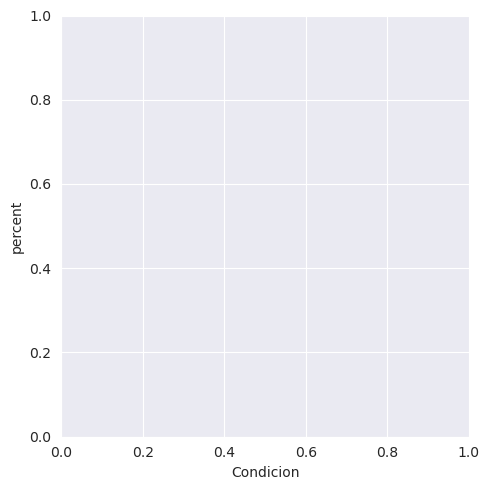

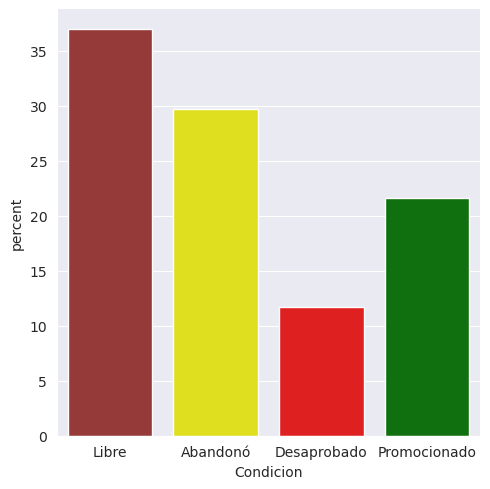

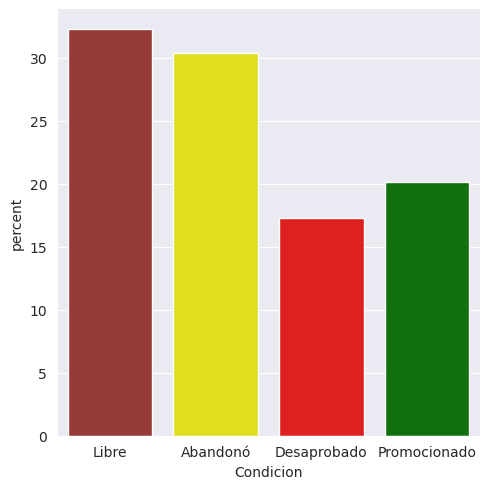

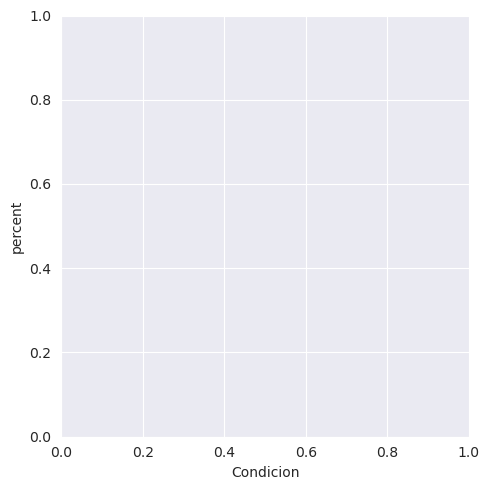

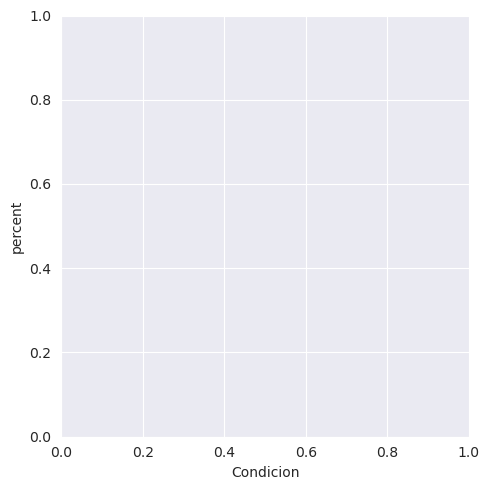

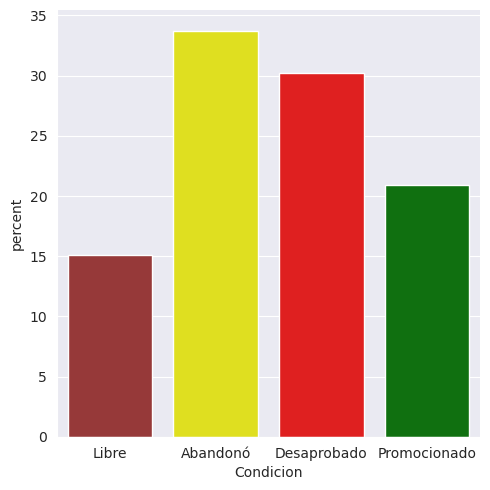

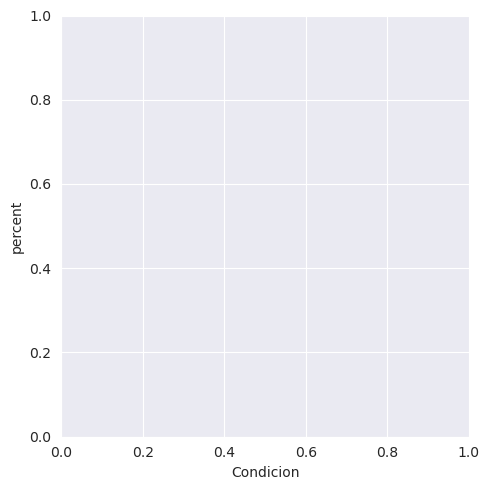

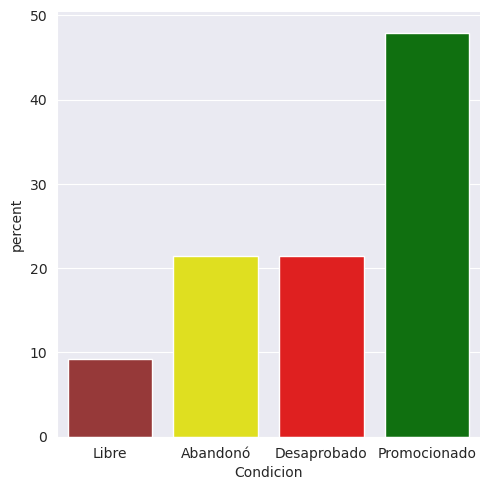

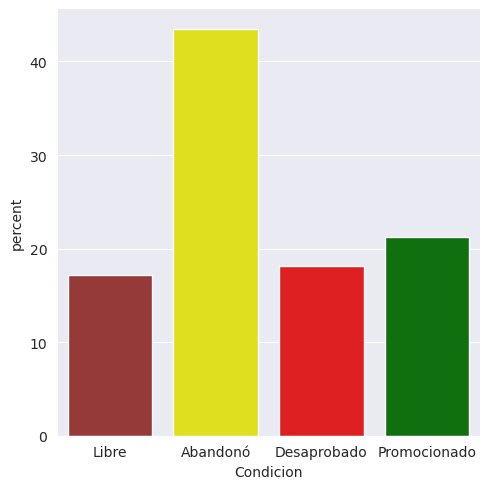

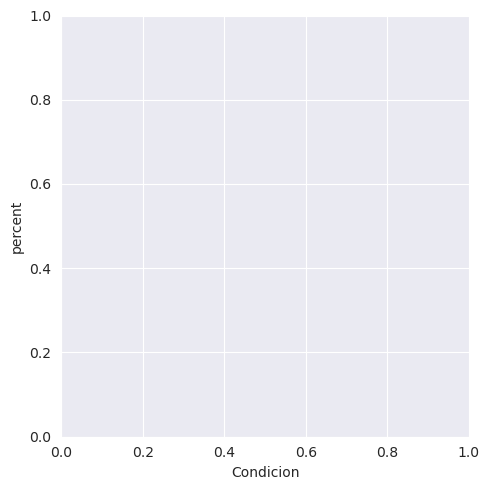

In [27]:
for año in range(2020, 2025, 1):
    for cursada in ["Verano", "1er Semestre", "Intensiva"]:
        data = filtered_data(mate_pi, año, cursada)
        sns.catplot(data=data, x="Condicion", kind="count", stat="percent", palette=["brown", "yellow", "red", "green"], hue="Condicion", legend=False )

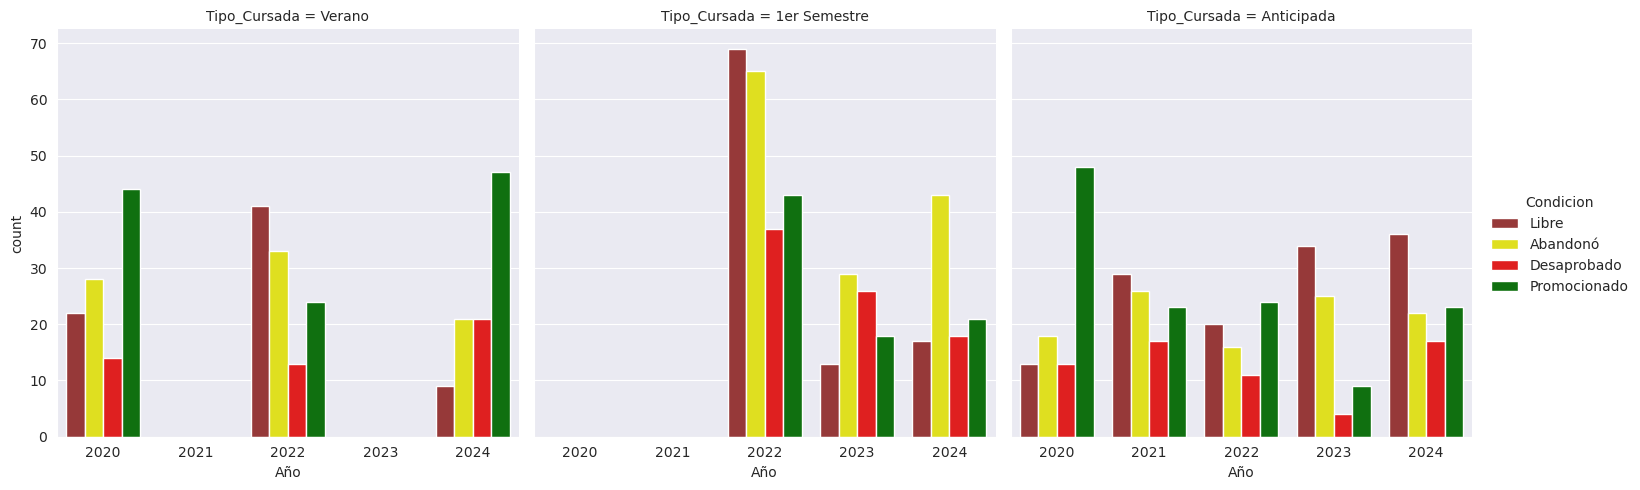

In [28]:
sns.catplot(data=mate_pi, x="Año", kind="count", hue="Condicion", col="Tipo_Cursada", palette=["brown", "yellow", "red", "green"])

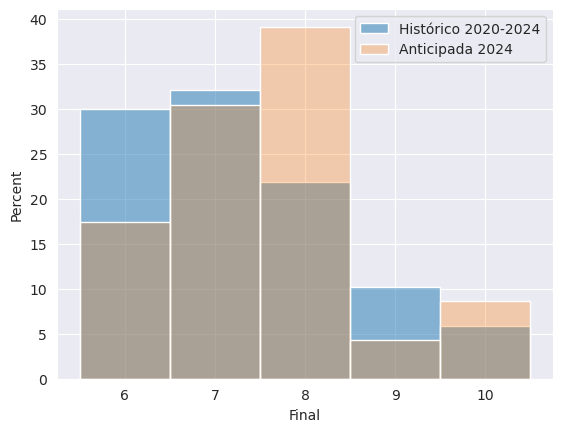

In [29]:
sns.histplot(data=mate_pi, x="Final", bins=5, stat="percent", alpha=0.5, discrete=True, label="Histórico 2020-2024")
sns.histplot(data=Anticipada_2024, x="Final", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()

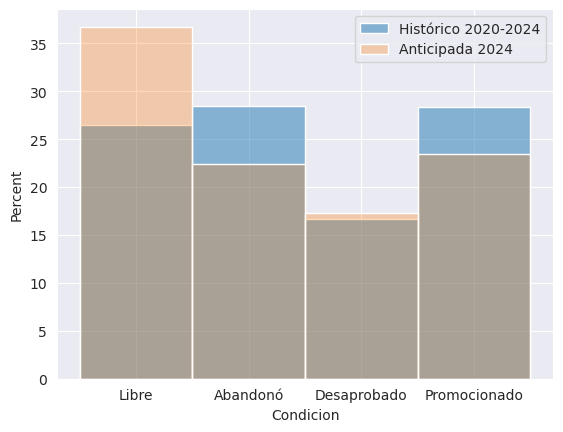

In [30]:
sns.histplot(data=mate_pi, x="Condicion", bins=5, stat="percent", alpha=0.5, discrete=True, label="Histórico 2020-2024")
sns.histplot(data=Anticipada_2024, x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()

In [31]:
Anticipadas = mate_pi[ mate_pi["Tipo_Cursada"] == "Anticipada" ]

In [32]:
Anticipadas

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
108,8.7,NaN,7.90,NaN,NaN,NaN,Promocionado,9.0,2020,Anticipada,Sí,Aprobado,NaN
109,6.6,NaN,NaN,NaN,NaN,NaN,Abandonó,NaN,2020,Anticipada,Sí,NaN,NaN
110,6.0,NaN,7.95,NaN,NaN,NaN,Promocionado,8.0,2020,Anticipada,Sí,Aprobado,NaN
111,5.9,NaN,5.20,4.4,NaN,8.3,Promocionado,8.0,2020,Anticipada,Sí,Aprobado,NaN
112,5.3,NaN,4.30,3.3,NaN,5.2,Desaprobado,NaN,2020,Anticipada,Sí,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,NaN,0.9,0.40,0.9,NaN,NaN,Desaprobado,NaN,2024,Anticipada,No,NaN,NaN
1140,NaN,NaN,NaN,NaN,NaN,NaN,Libre,NaN,2024,Anticipada,No,NaN,NaN
1141,7.0,NaN,8.50,NaN,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
1142,0.2,NaN,NaN,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN


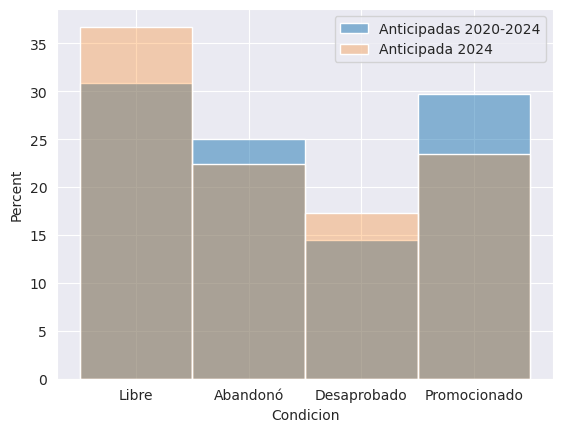

In [33]:
sns.histplot(data=Anticipadas, x="Condicion", bins=5, stat="percent", alpha=0.5, discrete=True, label="Anticipadas 2020-2024")
sns.histplot(data=Anticipada_2024, x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()

<Axes: xlabel='1P1F', ylabel='Percent'>

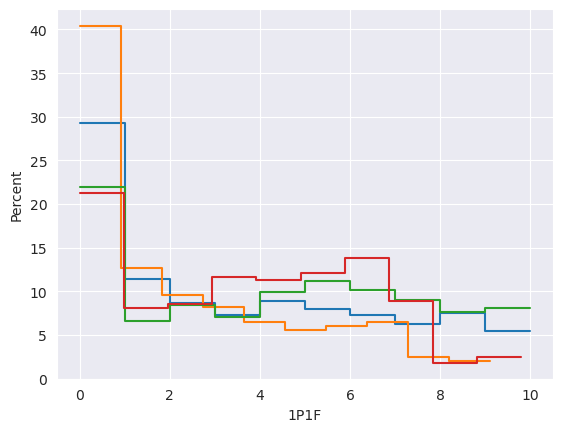

In [34]:
sns.histplot(data=mate_pi, x="1P1F", bins=10, stat="percent", fill=False, element="step")
sns.histplot(data=mate_pi, x="1P2F", bins=10, stat="percent", fill=False, element="step")
sns.histplot(data=mate_pi, x="2P1F", bins=10, stat="percent", fill=False, element="step")
sns.histplot(data=mate_pi, x="2P2F", bins=10, stat="percent", fill=False, element="step")

In [35]:
mate_pi.dtypes

1P1F             float64
1P2F             float64
2P1F             float64
2P2F             float64
F1               float64
F2               float64
Condicion       category
Final            float64
Año                int64
Tipo_Cursada    category
Virtual           object
Oral              object
Grupo             object
dtype: object

In [36]:
Flotantes = mate_pi.merge(mate_pi[["F1","F2"]].dropna(how="all"), left_index=True, right_index=True, how="inner", suffixes=["","_copy"])

In [37]:
Flotantes[Flotantes["Condicion"]=="Abandonó"] 

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo,F1_copy,F2_copy
620,5.0,NaN,NaN,NaN,NaN,0.0,Abandonó,NaN,2022,Anticipada,No,NaN,NaN,NaN,0.0


**ESE DATO ESTA MAL REGISTRADO**

Hay una inconsistencia, de acuerdo a sus notas aprobó Primer Parcial y desaprobó el Segundo en el Flotante, su condición debería ser Desaprobado. Voy a tratarlo como si la calificación 0.0 fuera un error de tipeo, o en cualquier caso, considerar que el alumno Abandonó y no se presentó al Flotante.

In [38]:
mate_pi.loc[620,"F2"] = np.NaN

In [39]:
mate_pi.iloc[620]

1P1F                   5.0
1P2F                   NaN
2P1F                   NaN
2P2F                   NaN
F1                     NaN
F2                     NaN
Condicion         Abandonó
Final                  NaN
Año                   2022
Tipo_Cursada    Anticipada
Virtual                 No
Oral                   NaN
Grupo                  NaN
Name: 620, dtype: object

In [40]:
Flotantes = mate_pi.merge(mate_pi[["F1","F2"]].dropna(how="all"), left_index=True, right_index=True, how="inner", suffixes=["","_copy"])

In [41]:
Flotantes["Condicion"].value_counts()

Condicion
Promocionado    79
Desaprobado     67
Libre            0
Abandonó         0
Name: count, dtype: int64

In [42]:
print("Flotante de Primer Parcial:")
print(f"Rindieron {Flotantes[ ~Flotantes["F1"].isna() ]["F1"].count()} personas")
for i in ["Promocionado", "Desaprobado"]:
    print(f"{i}s: {Flotantes[ ~Flotantes["F1"].isna() ]["Condicion"].value_counts(normalize=True).loc[ i ]: .2%}")
print("\n")
print("Flotante de Segundo Parcial:")
print(f"Rindieron {Flotantes[ ~Flotantes["F2"].isna() ]["F2"].count()} personas")
for i in ["Promocionado", "Desaprobado"]:
    print(f"{i}s: {Flotantes[ ~Flotantes["F2"].isna() ]["Condicion"].value_counts(normalize=True).loc[ i ]: .2%}")

Flotante de Primer Parcial:
Rindieron 76 personas
Promocionados:  60.53%
Desaprobados:  39.47%


Flotante de Segundo Parcial:
Rindieron 70 personas
Promocionados:  47.14%
Desaprobados:  52.86%


----------------------------------

# 1. Análisis Anticipada 2024

Vamos a comparar las estadísticas generales del curso:

- Cantidad de inscriptos
- Porcentaje de Libres, Abandonó, Desaprobado, Promocionado

Vamos a hacerlo respecto al total de la base de datos (Histórico) y respecto a las Anticipadas de los últimos años.

## 1.1. Resultados Anticipada 2024

In [43]:
Anticipada_2024 = filtered_data( mate_pi, 2024, "Anticipada" )

In [44]:
Anticipada_2024

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
1046,4.4,8.0,6.0,NaN,NaN,NaN,Promocionado,7.0,2024,Anticipada,No,NaN,NaN
1047,0.0,0.4,0.0,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN
1048,4.5,6.1,5.9,NaN,NaN,NaN,Promocionado,6.0,2024,Anticipada,No,NaN,NaN
1049,NaN,8.2,9.5,NaN,NaN,NaN,Promocionado,9.0,2024,Anticipada,No,NaN,NaN
1050,9.5,NaN,NaN,6.3,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,NaN,0.9,0.4,0.9,NaN,NaN,Desaprobado,NaN,2024,Anticipada,No,NaN,NaN
1140,NaN,NaN,NaN,NaN,NaN,NaN,Libre,NaN,2024,Anticipada,No,NaN,NaN
1141,7.0,NaN,8.5,NaN,NaN,NaN,Promocionado,8.0,2024,Anticipada,No,NaN,NaN
1142,0.2,NaN,NaN,NaN,NaN,NaN,Abandonó,NaN,2024,Anticipada,No,NaN,NaN


In [45]:
inscriptos_2024 = Anticipada_2024.shape[0]
print(f"Cantidad de inscriptos: {inscriptos_2024}")

Cantidad de inscriptos: 98


### 1.1.1. Porcentajes de aprobados/desaprobados/libres:

In [46]:
Anticipada_2024["Condicion"].value_counts(normalize=True).round(2)

Condicion
Libre           0.37
Promocionado    0.23
Abandonó        0.22
Desaprobado     0.17
Name: proportion, dtype: float64

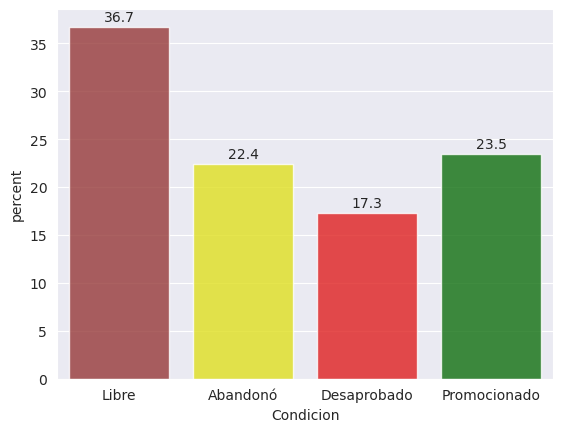

In [47]:
ax = sns.countplot(data=Anticipada_2024,
              x="Condicion",
              hue="Condicion",
              stat="percent",
              alpha=0.8,
              palette=["brown", "yellow", "red", "green"])
for i in ax.containers:
    ax.bar_label(i, padding=2, fmt="%.1f")
plt.show()

Calculemos la cantidad de alumnos que se presentaron a rendir alguna vez:

In [48]:
parciales = ["1P1F", "1P2F", "2P1F", "2P2F", "F1", "F2"]

In [49]:
presentados_2024 = Anticipada_2024[ parciales ].dropna(how="all")

In [50]:
print("Anticipada 2024")
print("Cantidad de presentados:", presentados_2024.shape[0])
print("Proporción respecto a inscriptos:", f"{presentados_2024.shape[0]/inscriptos_2024: 0.2%}")

Anticipada 2024
Cantidad de presentados: 62
Proporción respecto a inscriptos:  63.27%


Notamos una fuerte deserción incluso antes del primer parcial: **sólo el 63.27% de los inscriptos rindió alguna instancia de parcial**.

### 1.1.2. Evolución de cantidad de presentados por parcial

In [51]:
presentados_2024["Rindio_1P"] = ~presentados_2024["1P1F"].isna() | ~presentados_2024["1P2F"].isna()
presentados_2024["Rindio_2P"] = ~presentados_2024["2P1F"].isna() | ~presentados_2024["2P2F"].isna()

In [52]:
presentados_2024[["Rindio_1P", "Rindio_2P"]].sum()

Rindio_1P    62
Rindio_2P    45
dtype: int64

Vemos que rindieron 62 personas el primer parcial, y 45 el segundo parcial. Nadie rindió el segundo sin haber rendido antes el primero, por eso la cantidad total de presentados coincide con la de quienes riendieron 1P.

### 1.1.3. Evolución porcentual de las notas obtenidas en cada instancia de parcial

- **Comparación notas entre primera fecha y recuperatorio**

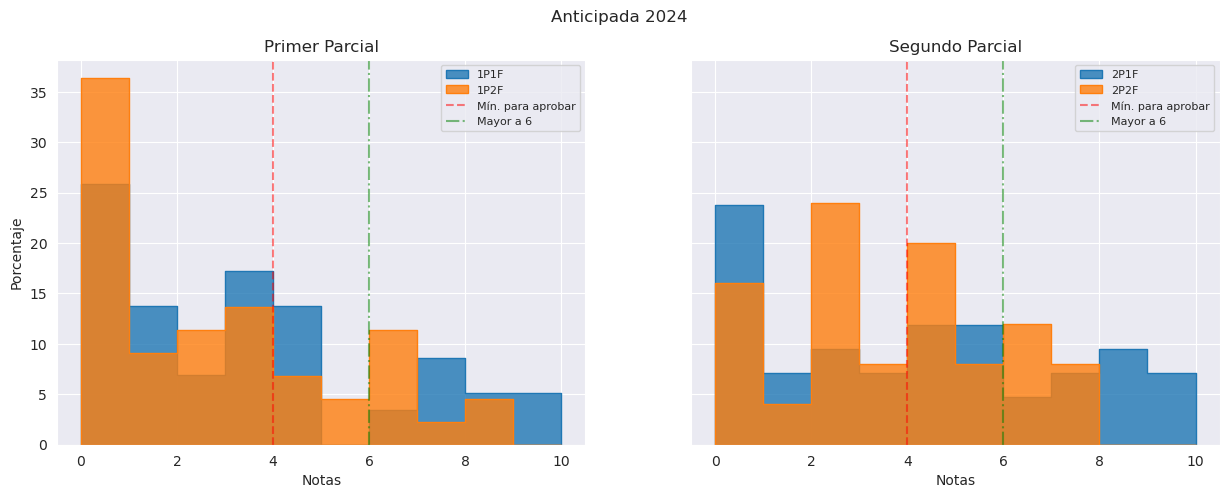

In [53]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))
sns.set_style("darkgrid")
for i in range(0,2):
    sns.histplot(data=presentados_2024, x=parciales[i], bins=range(0,11), stat="percent", element="step", alpha=0.8, label=parciales[i], ax=ax[0])
for i in range(2,4):    
    sns.histplot(data=presentados_2024, x=parciales[i], bins=range(0,11), stat="percent", element="step", alpha=0.8, label=parciales[i], ax=ax[1])
    
ax[0].axvline(x=4, color="red", alpha=0.5, ls="--", label="Mín. para aprobar")
ax[0].axvline(x=6, color="green", alpha=0.5, ls="-.", label="Mayor a 6")
ax[0].legend(fontsize=8)
ax[0].set_xlabel("Notas")
ax[0].set_ylabel("Porcentaje")
ax[0].set_title("Primer Parcial")

ax[1].axvline(x=4, color="red", alpha=0.5, ls="--", label="Mín. para aprobar")
ax[1].axvline(x=6, color="green", alpha=0.5, ls="-.", label="Mayor a 6")
ax[1].legend(fontsize=8)
ax[1].set_xlabel("Notas")
ax[1].set_title("Segundo Parcial")

fig.suptitle("Anticipada 2024")
plt.show()

Se evidencia que, en general, es mayor el porcentaje de desaprobados en el Primer Parcial que en el Segundo. Y respecto a la mejora entre primera fecha y recuperatorio, en el Segundo Parcial hay más gente accediendo a mejores notas que en el Primero, donde de hecho es mayor el porcentaje de notas bajas en el Recuperatorio del Primer Parcial que en la Primera Fecha.

Para ilustrar esto podemos calcular el porcentaje de desaprobados *entre fechas* del Primer Parcial y del Segundo Parcial:

In [54]:
des_1P1F = presentados_2024[presentados_2024["1P1F"]<4]["1P1F"].count()
des_1P2F = presentados_2024[presentados_2024["1P2F"]<4]["1P2F"].count()

des_2P1F = presentados_2024[presentados_2024["2P1F"]<4]["2P1F"].count()
des_2P2F = presentados_2024[presentados_2024["2P2F"]<4]["2P2F"].count()

print("Anticipada 2024","\n")
print(f"Desaprobados 1P1F: {des_1P1F}, representa el {des_1P1F / presentados_2024["1P1F"].dropna().count() : .2%} del total de presentados")
print(f"Desaprobados 1P2F: {des_1P2F}, representa el {des_1P2F / presentados_2024["1P2F"].dropna().count() : .2%} del total de presentados", "\n")

print(f"Desaprobados 2P1F: {des_2P1F}, representa el {des_2P1F / presentados_2024["2P1F"].dropna().count() : .2%} del total de presentados")
print(f"Desaprobados 2P2F: {des_2P2F}, representa el {des_2P2F / presentados_2024["2P2F"].dropna().count() : .2%} del total de presentados", "\n")

Anticipada 2024 

Desaprobados 1P1F: 37, representa el  63.79% del total de presentados
Desaprobados 1P2F: 31, representa el  70.45% del total de presentados 

Desaprobados 2P1F: 20, representa el  47.62% del total de presentados
Desaprobados 2P2F: 13, representa el  52.00% del total de presentados 



Los resultados evidencian que en realidad en ningún caso hay una mejora en el porcentaje de desaprobados: en el gráfico vemos una mejora en las puntuaciones, pero la cantidad de notas debajo de 4 no llega a aumentar entre primera fecha y recuperatorio. Sin embargo, sí es claro que la diferencia es más acentuada en el caso del Primer Parcial. En el Segundo los porcentajes son muy similares.

Por otro lado, tanto el gráfico como los cálculos muestran que en el Segundo Parcial hay un mayor porcentaje de aprobados que en el Primer Parcial.

- **Comparación notas entre primer parcial y segundo parcial**

In [55]:
bajaron_nota_1P_2024 = presentados_2024[parciales[0:2]][presentados_2024["1P1F"] > presentados_2024["1P2F"]]

In [56]:
resto_1P_2024 = presentados_2024[parciales[0:2]][~(presentados_2024["1P1F"] > presentados_2024["1P2F"])]

In [57]:
resto_1P_2024.shape

(50, 2)

In [58]:
bajaron_nota_1P_2024.shape

(12, 2)

In [59]:
# Cambiando por 0 los NaN en el caso de resto_1P_2024 y usando los valores máximos como nota final:
resto_1P_2024["Nota 1P"] = resto_1P_2024.fillna(0).apply(max, axis=1)

In [60]:
# En el caso de los bajaron_nota_1P_2024, me quedo con la última nota obtenida, que ya es numérica:
bajaron_nota_1P_2024["Nota 1P"] = bajaron_nota_1P_2024["1P2F"]

In [61]:
# Uno los resultados en un mismo DataFrame
notas_1P_2024 = pd.concat([bajaron_nota_1P_2024, resto_1P_2024])

In [62]:
# Merging con el dataset original:
presentados_2024 = presentados_2024.merge(notas_1P_2024["Nota 1P"], how="outer", left_index=True, right_index=True)

In [63]:
presentados_2024

,1P1F,1P2F,2P1F,2P2F,F1,F2,Rindio_1P,Rindio_2P,Nota 1P
1046,4.4,8.0,6.0,NaN,NaN,NaN,True,True,8.0
1047,0.0,0.4,0.0,NaN,NaN,NaN,True,True,0.4
1048,4.5,6.1,5.9,NaN,NaN,NaN,True,True,6.1
1049,NaN,8.2,9.5,NaN,NaN,NaN,True,True,8.2
1050,9.5,NaN,NaN,6.3,NaN,NaN,True,True,9.5
...,...,...,...,...,...,...,...,...,...
1136,10.0,NaN,10.0,NaN,NaN,NaN,True,True,10.0
1138,3.6,4.0,5.8,5.2,10.0,NaN,True,True,4.0
1139,NaN,0.9,0.4,0.9,NaN,NaN,True,True,0.9
1141,7.0,NaN,8.5,NaN,NaN,NaN,True,True,7.0


In [64]:
# Hay que hacer lo mismo para el Segundo Parcial:

# Primero hay que filtrar los que no se presentaron a ninguna fecha:
rindieron_2P_2024 = presentados_2024[parciales[2:4]].dropna(how="all")

# Ahora sí, separo los que bajaron nota del resto:
bajaron_nota_2P_2024 = rindieron_2P_2024[rindieron_2P_2024["2P1F"] > rindieron_2P_2024["2P2F"]]

resto_2P_2024 = rindieron_2P_2024[~(rindieron_2P_2024["2P1F"] > rindieron_2P_2024["2P2F"])]

# Cambiando por 0 los NaN en el caso de resto_2P_2024 y usando los valores máximos como nota final:
resto_2P_2024["Nota 2P"] = resto_2P_2024.fillna(0).apply(max, axis=1)
# En el caso de los bajaron_nota_2P_2024, me quedo con la última nota obtenida, que ya es numérica:
bajaron_nota_2P_2024["Nota 2P"] = bajaron_nota_2P_2024["2P2F"]

# Uno los resultados en un mismo DataFrame:
notas_2P_2024 = pd.concat([bajaron_nota_2P_2024, resto_2P_2024])

/tmp/ipykernel_10375/1565706118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resto_2P_2024["Nota 2P"] = resto_2P_2024.fillna(0).apply(max, axis=1)
/tmp/ipykernel_10375/1565706118.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bajaron_nota_2P_2024["Nota 2P"] = bajaron_nota_2P_2024["2P2F"]


In [65]:
# Merging con el dataset original:
presentados_2024 = presentados_2024.merge(notas_2P_2024["Nota 2P"], how="outer", left_index=True, right_index=True)

In [66]:
presentados_2024

,1P1F,1P2F,2P1F,2P2F,F1,F2,Rindio_1P,Rindio_2P,Nota 1P,Nota 2P
1046,4.4,8.0,6.0,NaN,NaN,NaN,True,True,8.0,6.0
1047,0.0,0.4,0.0,NaN,NaN,NaN,True,True,0.4,0.0
1048,4.5,6.1,5.9,NaN,NaN,NaN,True,True,6.1,5.9
1049,NaN,8.2,9.5,NaN,NaN,NaN,True,True,8.2,9.5
1050,9.5,NaN,NaN,6.3,NaN,NaN,True,True,9.5,6.3
...,...,...,...,...,...,...,...,...,...,...
1136,10.0,NaN,10.0,NaN,NaN,NaN,True,True,10.0,10.0
1138,3.6,4.0,5.8,5.2,10.0,NaN,True,True,4.0,5.2
1139,NaN,0.9,0.4,0.9,NaN,NaN,True,True,0.9,0.9
1141,7.0,NaN,8.5,NaN,NaN,NaN,True,True,7.0,8.5


Ya podemos graficar los porcentajes de cada nota obtenida en el primer parcial y en el segundo parcial:

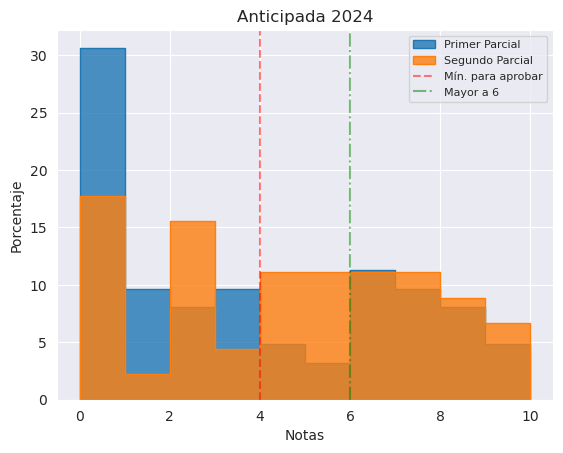

In [67]:
sns.histplot(data=presentados_2024, x="Nota 1P", bins=range(0,11), stat="percent", element="step", alpha=0.8, label="Primer Parcial")
sns.histplot(data=presentados_2024, x="Nota 2P", bins=range(0,11), stat="percent", element="step", alpha=0.8, label="Segundo Parcial")
plt.title("Anticipada 2024")
plt.axvline(x=4, color="red", alpha=0.5, ls="--", label="Mín. para aprobar")
plt.axvline(x=6, color="green", alpha=0.5, ls="-.", label="Mayor a 6")
plt.legend(fontsize=8)
plt.xlabel("Notas")
plt.ylabel("Porcentaje")
plt.show()

Vemos que hay mejores notas en el Segundo Parcial que en el Primer Parcial, aunque los porcentajes de notas altas (por encima de 6) son similares:

In [68]:
print("Anticipada 2024 \n")
print(f"Aprobados 1P:{presentados_2024[ presentados_2024["Nota 1P"] >= 4 ]["Nota 1P"].count() / presentados_2024["Rindio_1P"].sum(): .2%}")
print(f"Mayor a 6 en 1P:{presentados_2024[ presentados_2024["Nota 1P"] >= 6 ]["Nota 1P"].count() / presentados_2024["Rindio_1P"].sum(): .2%}", "\n")

print(f"Aprobados 2P:{presentados_2024[ presentados_2024["Nota 2P"] >= 4 ]["Nota 2P"].count() / presentados_2024["Rindio_2P"].sum(): .2%}")
print(f"Mayor a 6 en 2P:{presentados_2024[ presentados_2024["Nota 2P"] >= 6 ]["Nota 2P"].count() / presentados_2024["Rindio_2P"].sum(): .2%}")

Anticipada 2024 

Aprobados 1P: 41.94%
Mayor a 6 en 1P: 33.87% 

Aprobados 2P: 60.00%
Mayor a 6 en 2P: 37.78%


- **Cantidad de promocionados luego del Flotante**

Veamos los resultados del Flotante y qué porcentaje de los que rinden logran promocionar:

In [69]:
flotante_2024 = presentados_2024[["F1", "F2"]].dropna(how="all")

In [70]:
flotante_2024

,F1,F2
1052,NaN,3.3
1058,4.9,NaN
1064,6.8,NaN
1069,NaN,7.0
1072,NaN,2.2
1075,NaN,5.3
1076,NaN,6.7
1092,8.2,NaN
1103,8.2,NaN
1135,NaN,4.0


In [71]:
flotante_completo_2024 = Anticipada_2024.merge( flotante_2024, right_index=True, left_index=True, how="inner", suffixes=["","_copy"])

In [72]:
print(flotante_completo_2024 ["Condicion"].value_counts(normalize = True))

Condicion
Desaprobado     0.545455
Promocionado    0.454545
Libre           0.000000
Abandonó        0.000000
Name: proportion, dtype: float64


In [73]:
print("Anticipada 2024:", "\n")
for i in ["Promocionado", "Desaprobado"]:
    print(f"{i}s en Flotante: {flotante_completo_2024 ["Condicion"].value_counts(normalize = True).loc[ i ]: .2%}")

Anticipada 2024: 

Promocionados en Flotante:  45.45%
Desaprobados en Flotante:  54.55%


Tenemos paridad entre cantidad de Promocionados y Desaprobados en Flotante. Quisiera ver cuántos de los que rindieron Primer Parcial lograron la promoción, y lo mismo para el Segundo Parcial

In [74]:
print("Anticipada 2024", "\n")
print("Flotante de Primer Parcial:")
print(f"Rindieron {flotante_completo_2024[ ~flotante_completo_2024["F1"].isna() ]["F1"].count()} personas")
for i in ["Promocionado", "Desaprobado"]:
    print(f"{i}s: {flotante_completo_2024[ ~flotante_completo_2024["F1"].isna() ]["Condicion"].value_counts(normalize=True).loc[ i ]: .2%}")
print("\n")
print("Flotante de Segundo Parcial:")
print(f"Rindieron {flotante_completo_2024[ ~flotante_completo_2024["F2"].isna() ]["F2"].count()} personas")
for i in ["Promocionado", "Desaprobado"]:
    print(f"{i}s: {flotante_completo_2024[ ~flotante_completo_2024["F2"].isna() ]["Condicion"].value_counts(normalize=True).loc[ i ]: .2%}")

Anticipada 2024 

Flotante de Primer Parcial:
Rindieron 5 personas
Promocionados:  60.00%
Desaprobados:  40.00%


Flotante de Segundo Parcial:
Rindieron 6 personas
Promocionados:  33.33%
Desaprobados:  66.67%


Notamos que en la Anticipada 2024 **la mayoría de los que recuperaron Primer Parcial en el Flotante lograron la Promoción**; lo opuesto ocurrió con el Segundo Parcial.

## 1.2. Comparación con las Anticipadas desde el año 2020

Tengo ya filtrados los datos en los DataFrames *Anticipadas* y en *Anticipada_2024*.

### 1.2.1. Porcentajes de aprobados/desaprobados/libres:

**Evolución por año**

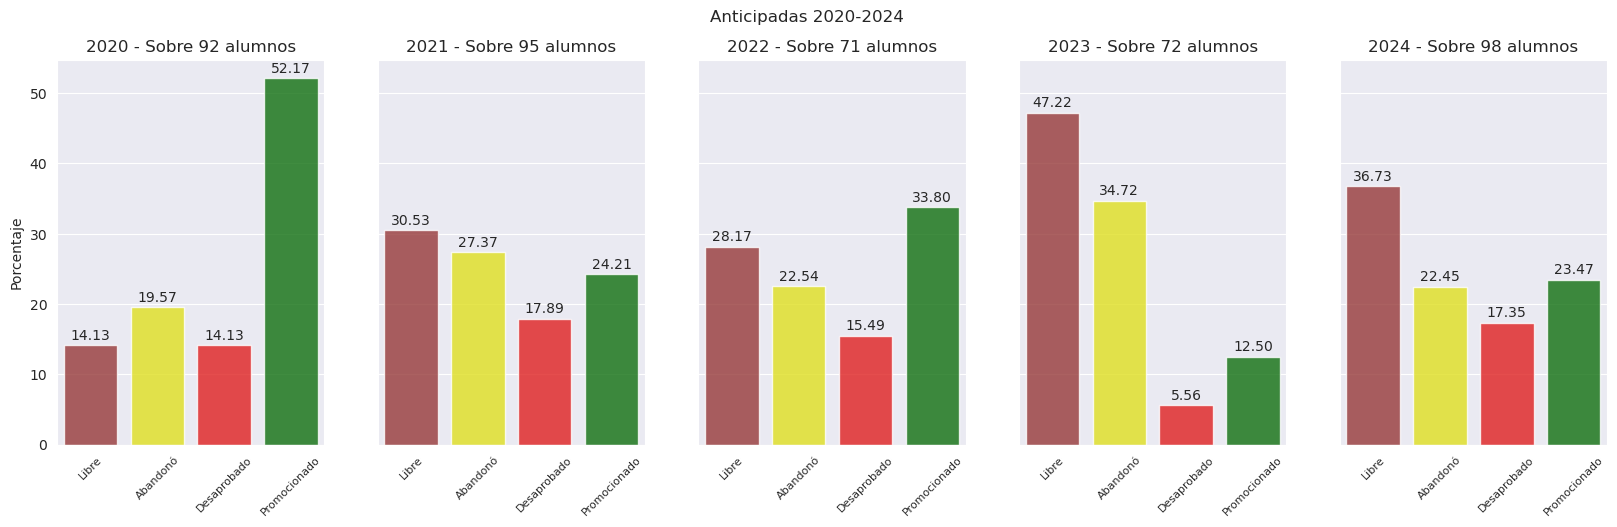

In [75]:
# Evolución por año
fig, ax = plt.subplots(1,5, sharey = True, figsize = (20,5))
for i in range(0,5):
    sns.countplot(data=Anticipadas[ Anticipadas["Año"] == (2020 + i)],
                  x="Condicion",
                  hue="Condicion",
                  stat="percent",
                  alpha=0.8,
                  palette=["brown", "yellow", "red", "green"],
                  ax = ax[i])
    ax[i].set_title(f"{2020+i} - Sobre {Anticipadas[ Anticipadas["Año"] == (2020 + i)].shape[0]} alumnos")
    ax[i].set_ylabel("Porcentaje")
    ax[i].set_xlabel("")
    ax[i].tick_params(axis="x", labelsize = 8, rotation=45)

    for element in ax[i].containers:
        ax[i].bar_label(element, padding=2, fmt="%.2f")

plt.suptitle("Anticipadas 2020-2024")
plt.show()

Podemos graficar la evolución de cada categoría en función del tiempo:

In [76]:
Anticipadas.groupby("Año")["Condicion"].value_counts(normalize=True)

Año   Condicion   
2020  Promocionado    0.521739
      Abandonó        0.195652
      Libre           0.141304
      Desaprobado     0.141304
2021  Libre           0.305263
      Abandonó        0.273684
      Promocionado    0.242105
      Desaprobado     0.178947
2022  Promocionado    0.338028
      Libre           0.281690
      Abandonó        0.225352
      Desaprobado     0.154930
2023  Libre           0.472222
      Abandonó        0.347222
      Promocionado    0.125000
      Desaprobado     0.055556
2024  Libre           0.367347
      Promocionado    0.234694
      Abandonó        0.224490
      Desaprobado     0.173469
Name: proportion, dtype: float64

In [77]:
Porcentajes_Anticipadas = pd.crosstab(index = Anticipadas["Año"], columns = Anticipadas["Condicion"], normalize = "index")
Porcentajes_Anticipadas = Porcentajes_Anticipadas * 100 # Paso a porcentajes

Porcentajes_Anticipadas

Condicion,Libre,Abandonó,Desaprobado,Promocionado
Año,,,,
2020,14.130435,19.565217,14.130435,52.173913
2021,30.526316,27.368421,17.894737,24.210526
2022,28.169014,22.535211,15.492958,33.802817
2023,47.222222,34.722222,5.555556,12.500000
2024,36.734694,22.448980,17.346939,23.469388


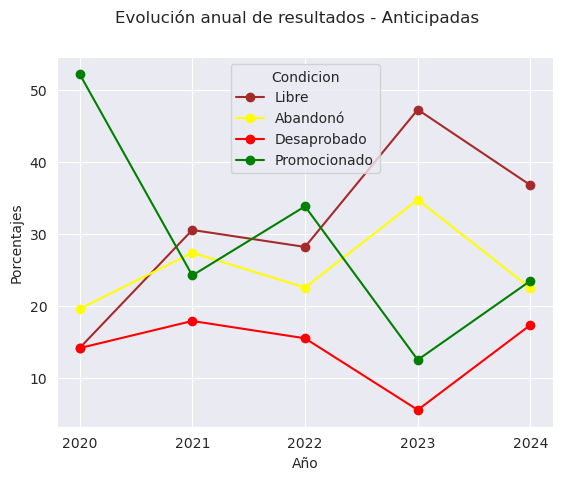

In [78]:
Porcentajes_Anticipadas.plot(marker="o",
                           xticks=range(2020,2025),
                           ylabel="Porcentajes",
                           color=["brown", "yellow", "red", "green"])
plt.suptitle("Evolución anual de resultados - Anticipadas")
plt.show()

En general se puede notar una *tendencia al alza de los alumnos libres*, que se inscriben pero no asisten a cursar o rendir, y una *tendencia a la baja de la cantidad de alumnos promocionados*. Respecto a los porcentajes de desaprobados y de alumnos que abandonan, estos se mantuvieron aproximadamente estables.

Siendo que la proporción de alumnos que quedan libres es cada vez más relevante, **resultaría interesante recalcular los porcentajes de aprobados/desaprobados pero sobre el total de alumnos activos**, es decir, aquellos que se presentan a alguna instancia de parcial.

In [79]:
Activos_Anticipadas = Anticipadas[ Anticipadas["Condicion"] != "Libre" ]

Porcentajes_Activos_Anticipadas = pd.crosstab(index = Activos_Anticipadas["Año"], columns = Activos_Anticipadas["Condicion"], normalize = "index")
Porcentajes_Activos_Anticipadas = Porcentajes_Activos_Anticipadas * 100 # Paso a porcentajes

Porcentajes_Activos_Anticipadas

Condicion,Abandonó,Desaprobado,Promocionado
Año,,,
2020,22.784810,16.455696,60.759494
2021,39.393939,25.757576,34.848485
2022,31.372549,21.568627,47.058824
2023,65.789474,10.526316,23.684211
2024,35.483871,27.419355,37.096774


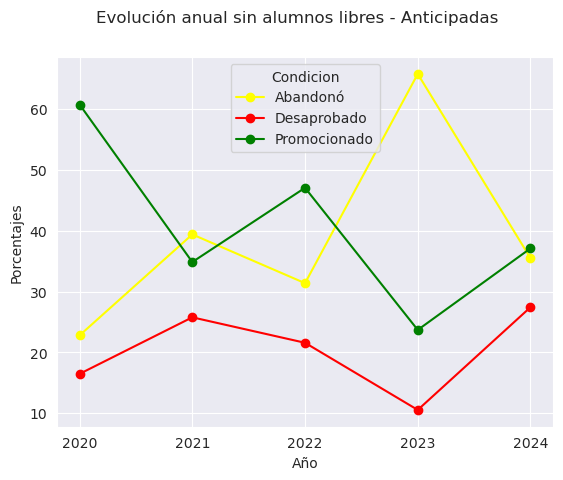

In [80]:
Porcentajes_Activos_Anticipadas.plot(marker="o",
                                   xticks=range(2020,2025),
                                   ylabel="Porcentajes",
                                   color=["yellow", "red", "green"])
plt.suptitle("Evolución anual sin alumnos libres - Anticipadas")
plt.show()

Como era de esperar, se mantienen las tendencias encontradas antes, aunque cambian las proporciones correspondientes. Podemos notar más claramente que la cantidad de alumnos que abandona en realidad parece experimentar una leve tendencia al alza. Podría cuantificarse mejor haciendo un ajuste lineal a cada conjunto de puntos.

### 1.2.2. Comparación con el total de las últimas Anticipadas

Voy a calcular los resultados sobre el total de las Anticipadas para comparar con el de la Anticipada 2024. Tenemos distintos enfoques:
- Considerar **todos los alumnos presentes en la base de datos** y calcular los porcentajes desde ahí. En ese caso estamos dando más peso a los grupos con más cantidad de estudiantes.
- **Promediar sobre los resultados obtenidos cada año**.
- **Construir una muestra de 100 estudiantes** tomados aleatoriamente de los 5 años disponibles, en igual cantidad por cada año. 

-> **Resultados generales de la base de datos**

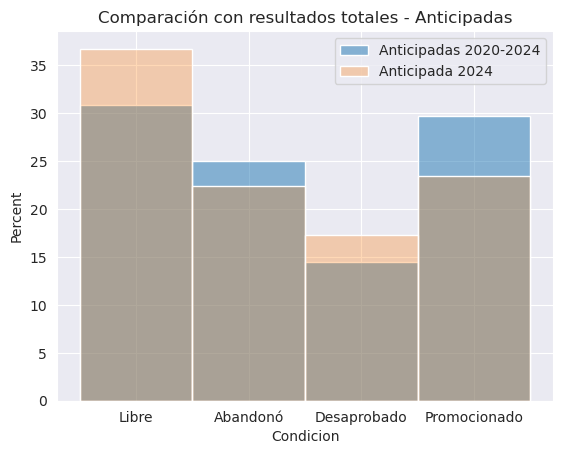

Condicion
Libre           30.841121
Promocionado    29.672897
Abandonó        25.000000
Desaprobado     14.485981
Name: proportion, dtype: float64

In [81]:
sns.histplot(data=Anticipadas, x="Condicion", bins=5, stat="percent", alpha=0.5, discrete=True, label="Anticipadas 2020-2024")
sns.histplot(data=Anticipada_2024, x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()
plt.title("Comparación con resultados totales - Anticipadas")
plt.show()

Anticipadas["Condicion"].value_counts(normalize=True) * 100

Vemos que el porcentaje de alumnos Libres resultó considerablemente mayor al total de las Anticipadas. Puede ser interesante considerar los resultados sólo sobre el total de alumnos activos (No Libres)

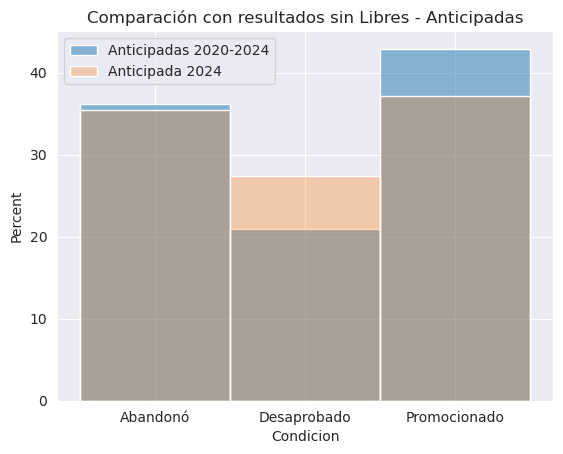

Anticipadas 2020-2024 sin Libres
Condicion
Promocionado    42.905405
Abandonó        36.148649
Desaprobado     20.945946
Libre            0.000000
Name: proportion, dtype: float64


Anticipada 2024 sin Libres
Condicion
Promocionado    37.096774
Abandonó        35.483871
Desaprobado     27.419355
Libre            0.000000
Name: proportion, dtype: float64


In [82]:
sns.histplot(data=Activos_Anticipadas, x="Condicion", bins=5, stat="percent", alpha=0.5, discrete=True, label="Anticipadas 2020-2024")
sns.histplot(data=Anticipada_2024[Anticipada_2024["Condicion"] != "Libre"], x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, label="Anticipada 2024")
plt.legend()
plt.title("Comparación con resultados sin Libres - Anticipadas")
plt.show()

print("Anticipadas 2020-2024 sin Libres")
print(Activos_Anticipadas["Condicion"].value_counts(normalize=True) * 100)
print("\n")
print("Anticipada 2024 sin Libres")
print(Anticipada_2024[Anticipada_2024["Condicion"] != "Libre"]["Condicion"].value_counts(normalize=True) * 100)

-> **Resultados promedio de la base de datos**

Calculemos los promedios de los porcentajes de aprobado/desaprobado, a partir de los datos del período 2020-2024

In [83]:
Promedios_Anticipadas = pd.crosstab(index = Anticipadas["Año"], columns = Anticipadas["Condicion"], normalize = "index").mean() * 100
Promedios_Anticipadas

Condicion
Libre           31.356536
Abandonó        25.328010
Desaprobado     14.084125
Promocionado    29.231329
dtype: float64

Está dando bastante parecido a lo que obtuvimos antes, parece que la diferencia en la cantidad de alumnos no resultó tan relevante. Hagamos el gráfico de todas formas.

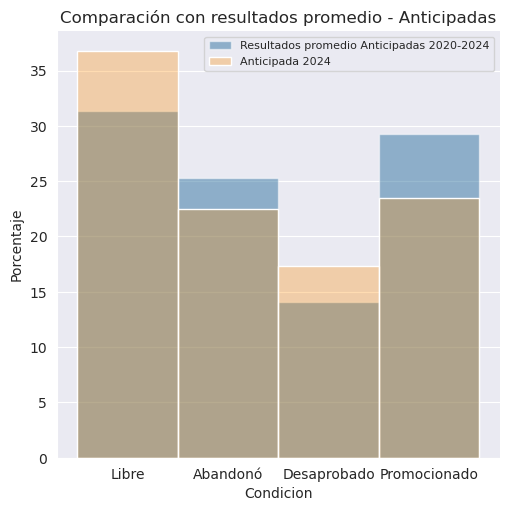

In [84]:
sns.catplot(data=Promedios_Anticipadas, kind="bar", gap=-0.25, alpha=0.5, label="Resultados promedio Anticipadas 2020-2024")
sns.histplot(data=Anticipada_2024, x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, color="darkorange", label="Anticipada 2024")
plt.legend(fontsize=8)
plt.ylabel("Porcentaje")
plt.title("Comparación con resultados promedio - Anticipadas")
plt.show()

-> **Resultados de un promedio de muestras aleatorias**

In [164]:
# Una muestra de 100 estudiantes, tomando aleatoriamente 20 de cada año
Anticipadas_sample = Anticipadas.groupby("Año").sample(n= 20)

In [170]:
# Tomemos 100 muestras aleatorias, cambiando la semilla, para que sean todas diferentes. Y promediemos los resultados:
seed = 1234
resultados_muestras = pd.DataFrame({"Libre": [], "Abandonó":[], "Desaprobado":[], "Promocionado":[]}) # Un dataframe vacio
for i in range(100):
    sample = Anticipadas.groupby("Año").sample(n= 20, random_state=seed*(2*i+1))
    sample_counts = sample["Condicion"].value_counts(normalize=True) * 100
    sample_dataFrame = pd.DataFrame([sample_counts], columns=["Libre", "Abandonó", "Desaprobado", "Promocionado"]).reset_index(drop=True)
    resultados_muestras = pd.concat([resultados_muestras, sample_dataFrame])

resultados_muestras.reset_index(drop=True, inplace=True)
resultados_muestras

,Libre,Abandonó,Desaprobado,Promocionado
0,32.0,23.0,15.0,30.0
1,27.0,25.0,18.0,30.0
2,36.0,31.0,12.0,21.0
3,31.0,24.0,10.0,35.0
4,30.0,20.0,17.0,33.0
...,...,...,...,...
95,38.0,23.0,15.0,24.0
96,31.0,27.0,15.0,27.0
97,35.0,18.0,16.0,31.0
98,31.0,28.0,9.0,32.0


Promediemos los porcentajes obtenidos en las muestras y grafiquemos respecto a la Anticipada 2024

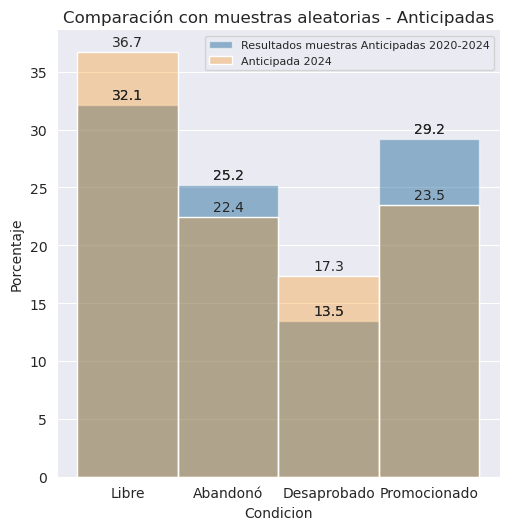

In [197]:
grid1 = sns.catplot(data=resultados_muestras.mean(), kind="bar", gap=-0.25, alpha=0.5, label="Resultados muestras Anticipadas 2020-2024")
ax1 = grid1.axes.flat[0]
for i in ax1.containers:
    ax1.bar_label(i, padding=2, fmt="%.1f")

grid2 = sns.histplot(data=Anticipada_2024, x="Condicion", bins=5, stat="percent", alpha=0.3, discrete=True, color="darkorange", label="Anticipada 2024")
ax2 = grid2.axes
for i in ax2.containers:
    ax2.bar_label(i, padding=2, fmt="%.1f")

plt.legend(fontsize=8)
plt.ylabel("Porcentaje")
plt.title("Comparación con muestras aleatorias - Anticipadas")
plt.show()

# 2. Resultados globales Ingreso 2020-2024